# Exploring r/redpillwomen submisions and comments

## Libraries & Setup

### Install

In [1]:
%pip install pandas numpy matplotlib seaborn transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 34.5 MB/s eta 0:00:00


In [2]:
# %pip install NewsSentiment

### Imports

In [3]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [4]:
# Use a pipeline as a high-level helper
from transformers import pipeline

### General configs

In [5]:
# matplotlib theme
plt.style.use('ggplot')

### Data loading

In [6]:
# get DATA_DIR
DATA_DIR = "data"

In [11]:
submission_redpill = pd.read_csv(
    f"https://raw.githubusercontent.com/MisterXY89/redpillwomen/main/data/submission_redpill_with_topic.csv?token=GHSAT0AAAAAABZLTBICQC4DNGE2R5FIWOIYZGLNAYA",
)

In [8]:
comments_redpill = pd.read_csv(
    "https://file.io/HcpF1MzWbAxp",
    names=["score", "date", "is_submitter", "author","link", "body"]
)

In [12]:
submission_redpill.columns

Index(['score', 'date', 'title', 'author_flair_text', 'link_flair_text',
       'locked', 'over_18', 'author', 'link', 'body', 'month', 'year',
       'month_year', 'date_ordinal', 'doc_text', 'topic', 'topic_label'],
      dtype='object')

In [13]:
# feature types
submission_redpill.date = pd.to_datetime(submission_redpill.date)
submission_redpill['year'] = submission_redpill['date'].dt.year
submission_redpill['month'] = submission_redpill['date'].dt.month

# topic & topic_label as categorical
submission_redpill['topic'] = submission_redpill['topic'].astype('category')
submission_redpill['topic_label'] = submission_redpill['topic_label'].astype('category')

In [14]:
print(
    submission_redpill.date.min(),
    submission_redpill.date.max()
)

2013-06-17 00:00:00 2022-12-31 00:00:00


In [15]:
comments_redpill

,score,date,is_submitter,author,link,body
0,2,2017-10-01,False,u/etf42,https://www.reddit.com/r/RedPillWomen/comments...,Men have always been more disposable due to th...
1,1,2017-10-01,False,u/throwawayklutch,https://www.reddit.com/r/RedPillWomen/comments...,"To me, these women seem like they just have no..."
2,2,2017-10-01,False,u/SouthernAthena,https://www.reddit.com/r/RedPillWomen/comments...,That attitude will get them far in life. But y...
3,8,2017-10-01,False,u/platewrecked,https://www.reddit.com/r/RedPillWomen/comments...,"Greg the OP is a suicidal, drug addled, datele..."
4,2,2017-10-01,False,u/thelampshade25,https://www.reddit.com/r/RedPillWomen/comments...,Very funny video i was loling the whole time
...,...,...,...,...,...,...
260825,1,2022-12-31,False,u/StoicGypsy,https://www.reddit.com/r/RedPillWomen/comments...,I’m sorry you are experiencing this and your f...
260826,2,2022-12-31,False,u/breemakin,https://www.reddit.com/r/RedPillWomen/comments...,People assign importance to different things a...
260827,2,2023-01-01,False,u/Neither-Suggestion78,https://www.reddit.com/r/RedPillWomen/comments...,I have a current partner who we don’t have any...
260828,3,2023-01-01,False,u/VasiliyZaitzev,https://www.reddit.com/r/RedPillWomen/comments...,&gt;I don’t want to be the one to ask numbers....


### Model loading

In [16]:
emotions_pipe = pipeline("text-classification", model="SamLowe/roberta-base-go_emotions", device=0)
sentiment_pipe = pipeline("text-classification", model="cardiffnlp/twitter-roberta-base-sentiment-latest", device=0)

Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


## Which topics are successful in terms of upvotes and comments?

In [17]:
# mean score per to pic anf get the top 10 topics
top_topics = submission_redpill.groupby('topic_label')["score"].mean().sort_values(ascending=False)

In [18]:
top_topics.head()

topic_label
Baseline relationship issues        30.214900
Gender roles: Alpha/Beta            25.225468
Personal self improvement (rec.)    24.498480
Education and Carreer               24.409975
Self care (rec.)                    24.403780
Name: score, dtype: float64

<Axes: title={'center': 'Most popular topics on r/redpillwomen'}, xlabel='Average upvotes', ylabel='Topic'>

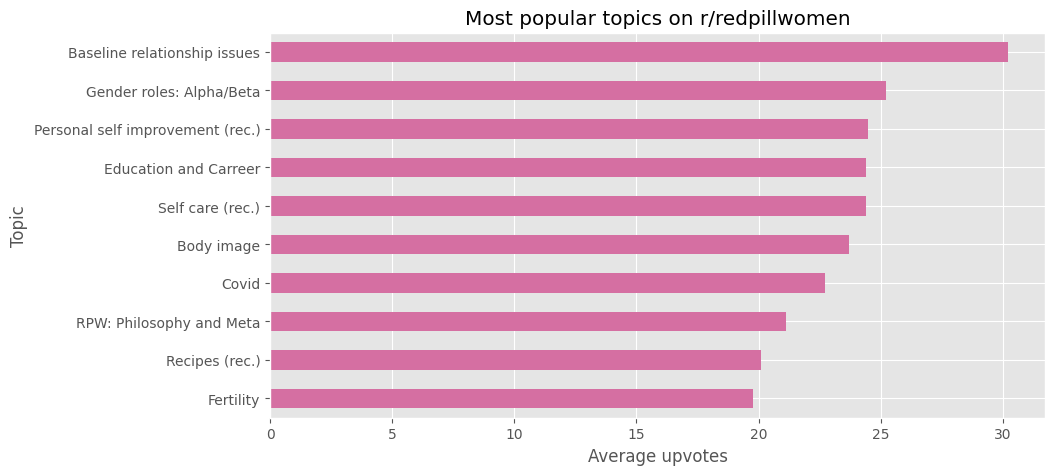

In [19]:
top_topics.sort_values(ascending=True).tail(10).plot.barh(
    figsize=(10, 5),
    title='Most popular topics on r/redpillwomen',
    color='#d56fa2',
    legend=False,
    xlabel='Average upvotes',
    ylabel='Topic'
)

## Preparing the data

We want to look at the sentiment and emotions of comments per topic, therefore we have to merge the submissions with the topic / append the topic to the comments. We will use the topic model from the previous notebook.

In [20]:
comments_redpill_df = comments_redpill.copy()

In [21]:
# Clean the comments body:
comments_redpill_df['body'] = comments_redpill_df['body'].str.replace('\n', ' ')
comments_redpill_df['body'] = comments_redpill_df['body'].str.replace('  ', ' ')

# set dtype to string
comments_redpill_df['body'] = comments_redpill_df['body'].astype(str)

# remove delted and removed posts
comments_redpill_df = comments_redpill_df[~comments_redpill_df['body'].str.contains('\[deleted\]|\[removed\]')]

In [22]:
# take needed cols from submussions
submission_topics_join = submission_redpill.copy()[["topic", "link"]]
print(submission_topics_join.link.unique())

['https://www.reddit.com/r/RedPillWomen/comments/1gja2g/suggested_reading_list/'
 'https://www.reddit.com/r/RedPillWomen/comments/1gj0zv/what_if_you_dont_want_kids_but_still_desire_a/'
 'https://www.reddit.com/r/RedPillWomen/comments/1givu9/whats_the_point_if_women_are_going_to_hit_the/'
 ...
 'https://www.reddit.com/r/RedPillWomen/comments/zzg2dv/ive_never_gotten_a_marriage_proposal_from_a_man/'
 'https://www.reddit.com/r/RedPillWomen/comments/zzkigt/husband_criticizes_my_cooking/'
 'https://www.reddit.com/r/RedPillWomen/comments/zznlc7/difference_between_a_man_who_invests_in_you_and/']


In [23]:
# look at comments urls
print(comments_redpill_df.link.unique())

['https://www.reddit.com/r/RedPillWomen/comments/72c55i/thought_i_was_a_feminist_but_am_i_actually_rpw/dnqjpj5/'
 'https://www.reddit.com/r/RedPillWomen/comments/73fub3/uni_girls_claim_most_men_are_too_dumb_for_them/dnqjqvl/'
 'https://www.reddit.com/r/RedPillWomen/comments/73fub3/uni_girls_claim_most_men_are_too_dumb_for_them/dnqk2gw/'
 ...
 'https://www.reddit.com/r/RedPillWomen/comments/zzg2dv/ive_never_gotten_a_marriage_proposal_from_a_man/j2fsrfo/'
 'https://www.reddit.com/r/RedPillWomen/comments/zzfs92/where_do_meet_men_outside_of_olddating_apps_for/j2ftl4m/'
 'https://www.reddit.com/r/RedPillWomen/comments/zzuwsk/women_that_went_from_blue_to_redpilled_how_did_it/j2fwvj6/']


In [24]:
# we have to remove the url affix to match
comments_redpill_df["link"] = comments_redpill_df["link"].str.split('/').str[:-2].str.join("/") + "/"

In [25]:
# now we can merge
comments_redpill_df = comments_redpill_df.merge(submission_topics_join, on='link', how='left')

In [26]:
# drop rows where topic is NaN
comments_redpill_df = comments_redpill_df.dropna(subset=['topic'])
print(comments_redpill_df.shape)

(138544, 7)


In [27]:
# make topic column an integer
comments_redpill_df['topic'] = comments_redpill_df['topic'].astype(int)

<Axes: ylabel='Frequency'>

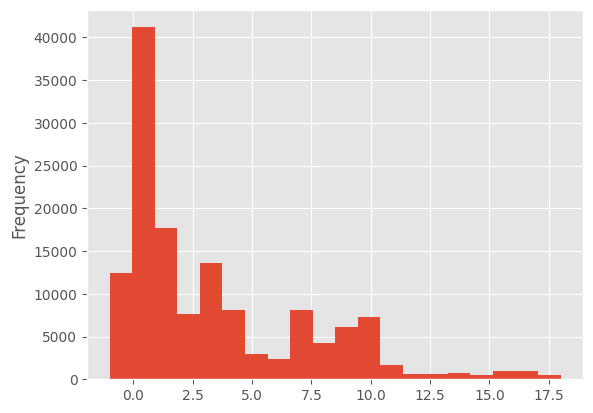

In [28]:
comments_redpill_df['topic'].plot.hist(bins=20)

In [29]:
# filter comments that belong to topic -1
comments_redpill_df = comments_redpill_df[comments_redpill_df['topic'] != -1]

In [30]:
# inspect the resuling df
comments_redpill_df.shape

(126079, 7)

In [31]:
comments_redpill_df.isna().sum()

score           0
date            0
is_submitter    0
author          0
link            0
body            0
topic           0
dtype: int64

In [32]:
comments_redpill_docs = comments_redpill_df["body"].to_list()

In [33]:
len(comments_redpill_docs)

126079

In [51]:
comments_redpill_df.reset_index(inplace=True)

## Sentiment

In [34]:
comments_sentiments = sentiment_pipe(comments_redpill_docs,  max_length=512, truncation=True)

In [35]:
print(comments_sentiments[126070:])

[{'label': 'positive', 'score': 0.7484657764434814}, {'label': 'neutral', 'score': 0.6186638474464417}, {'label': 'negative', 'score': 0.8042758107185364}, {'label': 'negative', 'score': 0.4846870005130768}, {'label': 'negative', 'score': 0.8484853506088257}, {'label': 'negative', 'score': 0.46299099922180176}, {'label': 'positive', 'score': 0.7953090667724609}, {'label': 'positive', 'score': 0.7333101034164429}, {'label': 'neutral', 'score': 0.5734258890151978}]


In [52]:
len(comments_sentiments)

126079

In [53]:
comments_sentiment_scores_df = pd.DataFrame(comments_sentiments)

# Add new columns
comments_redpill_df['sentiment_label'] = comments_sentiment_scores_df['label']
comments_redpill_df['sentiment_score'] = comments_sentiment_scores_df['score']

In [54]:
comments_sentiment_scores_df['label']

0         negative
1         negative
2         positive
3          neutral
4          neutral
            ...   
126074    negative
126075    negative
126076    positive
126077    positive
126078     neutral
Name: label, Length: 126079, dtype: object

In [55]:
comments_sentiment_scores_df.isna().sum()

label    0
score    0
dtype: int64

In [56]:
comments_redpill_df.isna().sum()

index              0
score              0
date               0
is_submitter       0
author             0
link               0
body               0
topic              0
sentiment_label    0
sentiment_score    0
dtype: int64

In [57]:
# save
comments_redpill_df.to_csv("redpill_comments_with_sentiment.csv", index=False)

In [146]:
comments_redpill_df.shape

(126079, 9)

## Emotions

In [58]:
comments_emotions = emotions_pipe(comments_redpill_docs, max_length=512, truncation=True)

In [59]:
print(comments_emotions[:10])

[{'label': 'neutral', 'score': 0.7197588682174683}, {'label': 'approval', 'score': 0.6612709164619446}, {'label': 'amusement', 'score': 0.9339616298675537}, {'label': 'neutral', 'score': 0.9697204828262329}, {'label': 'neutral', 'score': 0.8558502197265625}, {'label': 'disapproval', 'score': 0.6137570738792419}, {'label': 'approval', 'score': 0.21884708106517792}, {'label': 'approval', 'score': 0.6059619784355164}, {'label': 'approval', 'score': 0.38138240575790405}, {'label': 'neutral', 'score': 0.2743251919746399}]


In [60]:
comments_emotions_scores_df = pd.DataFrame(comments_emotions)

# Add new columns
comments_redpill_df['emotions_label'] = comments_emotions_scores_df['label']
comments_redpill_df['emotions_score'] = comments_emotions_scores_df['score']

In [61]:
# save
comments_redpill_df.to_csv("redpill_comments_topic_sentiment_emotions.csv", index=False)

## Verification

In [62]:
comments_redpill_df.shape

(126079, 12)

In [63]:
comments_redpill_df.head()

,index,score,date,is_submitter,author,link,body,topic,sentiment_label,sentiment_score,emotions_label,emotions_score
0,1,1,2017-10-01,False,u/throwawayklutch,https://www.reddit.com/r/RedPillWomen/comments...,"To me, these women seem like they just have no...",3,negative,0.729024,neutral,0.719759
1,2,2,2017-10-01,False,u/SouthernAthena,https://www.reddit.com/r/RedPillWomen/comments...,That attitude will get them far in life. But y...,3,negative,0.433742,approval,0.661271
2,4,2,2017-10-01,False,u/thelampshade25,https://www.reddit.com/r/RedPillWomen/comments...,Very funny video i was loling the whole time,3,positive,0.982675,amusement,0.933962
3,5,3,2017-10-01,False,u/indivisibleremainder,https://www.reddit.com/r/RedPillWomen/comments...,bucko,3,neutral,0.659083,neutral,0.969720
4,6,3,2017-10-01,False,u/indivisibleremainder,https://www.reddit.com/r/RedPillWomen/comments...,it's a statistical/evolutionary phenomenon. th...,3,neutral,0.588149,neutral,0.855850


In [64]:
comments_redpill_df.isna().sum()

index              0
score              0
date               0
is_submitter       0
author             0
link               0
body               0
topic              0
sentiment_label    0
sentiment_score    0
emotions_label     0
emotions_score     0
dtype: int64